# Harris Corner Detection
***

In [1]:
# notebook imports 
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

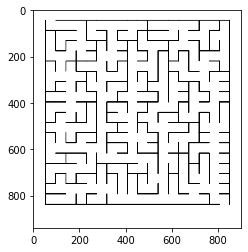

In [47]:
# loading in images
maze = cv2.imread('../Image_Data/maze.png')
maze = cv2.cvtColor(maze, cv2.COLOR_BGR2RGB)
maze_result = maze.copy()
maze_result_cv = maze.copy()
gray_maze = cv2.cvtColor(maze, cv2.COLOR_RGB2GRAY)
gray_maze = np.float32(gray_maze)
plt.imshow(gray_maze, cmap='gray')

In [41]:
# method to viewed images larger, used to enlarge crossword images 
def view_pic(img):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

***
## Manual Harris Corner Detection

In [33]:
# getting derivatives using sobel
sobelx = cv2.Sobel(gray_maze, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=3)
sobelx2 = sobelx * sobelx

sobely = cv2.Sobel(gray_maze, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=3)
sobely2 = sobely * sobely

sobelxy = sobelx * sobely

In [34]:
# setting up constants and variables for following algorithm
rows, cols = gray_maze.shape
R = np.zeros((rows, cols))
k = 0.04
rmax = 0

In [35]:
# computing M matrix using a 3x3 np.ones kernel and storing resulting R values
# note - corner pixels are ignored because I'm lazy
# This algorithm is poorly optimized and will take some time to run, sry
for row in range(1, rows - 1):
    for col in range(1, cols - 1):
        M = np.array([[np.sum(sobelx2[row-1:row+2, col-1:col+2]), np.sum(sobelxy[row-1:row+2, col-1:col+2])], 
                     [np.sum(sobelxy[row-1:row+2, col-1:col+2]), np.sum(sobely2[row-1:row+2, col-1:col+2])]], 
                     dtype=np.float32)
        R[row, col] = np.linalg.det(M) - k * (np.power(np.trace(M), 2))
        if R[row, col] > rmax:
            rmax = R[row, col]

In [36]:
# dilating R values to increase brightness and corner thresholds used in the following step
R_dilated = cv2.dilate(R, None)

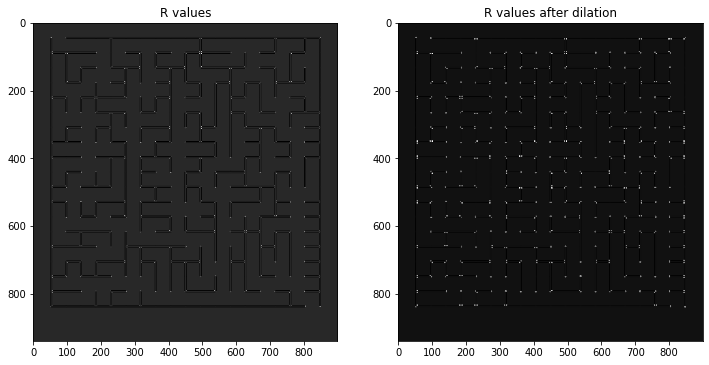

In [37]:
# showing results of manual Harris corner detection
fig, axarr = plt.subplots(1, 2, figsize=(12, 12))
axarr[0].set_title('R values')
axarr[0].imshow(R, cmap='gray')
axarr[1].set_title('R values after dilation')
axarr[1].imshow(R_dilated, cmap='gray')

In [39]:
# keeping R values above the threshold only - designated as corners
maze_result[R_dilated>0.01*rmax] = [255, 0, 0]

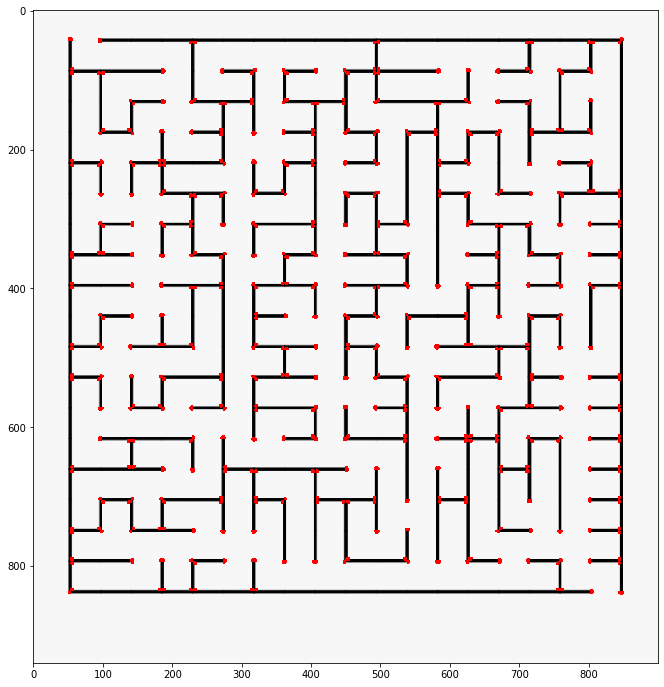

In [42]:
view_pic(maze_result)

***
## Opencv Harris Corner Detection

348751550.0 -145310960.0


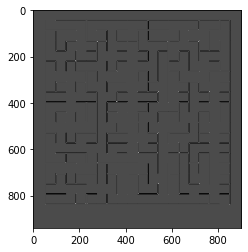

In [43]:
# opencv syntax
gray_maze_cv = np.float32(gray_maze)
harris_res = cv2.cornerHarris(src=gray_maze_cv, blockSize=2, ksize=3, k=0.04)
plt.imshow(harris_res, cmap='gray')
print(harris_res.max(), harris_res.min())

In [44]:
harris_res = cv2.dilate(harris_res, None)
maze_result_cv[harris_res>0.01*harris_res.max()] = [255, 0, 0]

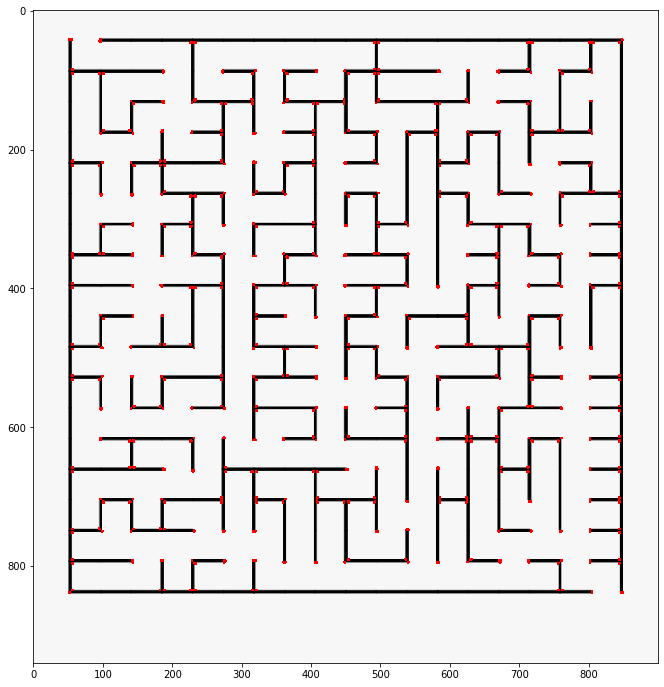

In [45]:
view_pic(maze_result_cv)

***
### References
* https://en.wikipedia.org/wiki/Harris_Corner_Detector
* https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_features_harris/py_features_harris.html
* https://en.wikipedia.org/wiki/Image_derivatives
* https://docs.opencv.org/3.4/d4/d7d/tutorial_harris_detector.html
* https://www.youtube.com/watch?v=veieEffgd5A
* https://stackoverflow.com/questions/3862225/implementing-a-harris-corner-detector
* https://medium.com/datadriveninvestor/understanding-edge-detection-sobel-operator-2aada303b900
***